<a href="https://www.kaggle.com/code/aleksandrmorozov123/damo-yolo?scriptVersionId=216095091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**DAMO-YOLO: a fast and accurate object detection method with some new techs, including NAS backbones, efficient RepGFPN, ZeroHead, AlignedOTA, and distillation enhancement**

In [4]:
!git clone https://github.com/tinyvision/damo-yolo.git

fatal: destination path 'damo-yolo' already exists and is not an empty directory.


In [5]:
!pip install --upgrade gdown
!pip install -r requirements.txt
!pip install cython
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install moviepy==0.2.3.5 imageio==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=93fae10ecbccf320e31fd7f4ac8796d8c3cdf9a3b87381c436c15e99ada3ed5e
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-varbpbpf
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-varbpbpf
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: f

In [6]:
from IPython.display import Image

from moviepy.video.fx.resize import resize
from moviepy.editor import VideoFileClip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.03047424/45929032 bytes (6.6%7372800/45929032 bytes (16.111796480/45929032 bytes (25.7%16236544/45929032 bytes (35.4%20692992/45929032 bytes (45.1%25190400/45929032 bytes (54.8%29655040/45929032 bytes (64.6%34111488/45929032 bytes (74.3%38617088/45929032 bytes (84.1%42967040/45929032 bytes (93.6%45929032/45929032 bytes (100.0%)
  Done
File saved as /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.


In [7]:
!wget -c https://www.pakutaso.com/shared/img/thumb/goriueseii-_28A5611-8954_TP_V4.jpg \
      -O ./assets/test_01.jpg

--2025-01-04 15:36:14--  https://www.pakutaso.com/shared/img/thumb/goriueseii-_28A5611-8954_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 133.242.30.52
Connecting to www.pakutaso.com (www.pakutaso.com)|133.242.30.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103510 (101K) [image/jpeg]
Saving to: './assets/test_01.jpg'

./assets/test_01.jp 100%[===================>] 101.08K   503KB/s    in 0.2s    

2025-01-04 15:36:15 (503 KB/s) - './assets/test_01.jpg' saved [103510/103510]



In [8]:
!wget -c https://raw.githubusercontent.com/timmeinhardt/trackformer/main/data/snakeboard/snakeboard.mp4 \
      -O ./assets/snakeboard.mp4

--2025-01-04 15:36:20--  https://raw.githubusercontent.com/timmeinhardt/trackformer/main/data/snakeboard/snakeboard.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1582397 (1.5M) [application/octet-stream]
Saving to: './assets/snakeboard.mp4'

./assets/snakeboard 100%[===================>]   1.51M  --.-KB/s    in 0.06s   

2025-01-04 15:36:20 (25.4 MB/s) - './assets/snakeboard.mp4' saved [1582397/1582397]



In [9]:
!mkdir pretrained_models

!gdown https://drive.google.com/uc?id=1-O-ObHN970GRVKkL1TiAxfoMCpYGJS6B \
  -O ./pretrained_models/damoyolo_tinynasL25_S.pth

Downloading...
From (original): https://drive.google.com/uc?id=1-O-ObHN970GRVKkL1TiAxfoMCpYGJS6B
From (redirected): https://drive.google.com/uc?id=1-O-ObHN970GRVKkL1TiAxfoMCpYGJS6B&confirm=t&uuid=cea14fdb-d7a5-4eab-8a6b-feff8e734978
To: /kaggle/working/damo-yolo/pretrained_models/damoyolo_tinynasL25_S.pth
100%|██████████████████████████████████████| 68.2M/68.2M [00:01<00:00, 47.5MB/s]


**Object detection on image**

In [29]:
!cp ./damo-yolo/tools/demo.py ./demo.py

!python demo.py \
  -f ./configs/damoyolo_tinynasL25_S.py \
  --engine ./pretrained_models/damoyolo_tinynasL25_S.pth \
  --engine_type torch \
  --conf 0.6 \
  --infer_size 640 640 \
  --device cuda \
  --path ./assets/test_01.jpg

usage: DAMO-YOLO Demo [-h] [-f CONFIG_FILE] [-p PATH] [--camid CAMID]
                      [--engine ENGINE] [--device DEVICE]
                      [--output_dir OUTPUT_DIR] [--conf CONF]
                      [--infer_size INFER_SIZE [INFER_SIZE ...]] [--end2end]
                      [--save_result SAVE_RESULT]
                      input_type
DAMO-YOLO Demo: error: unrecognized arguments: --engine_type


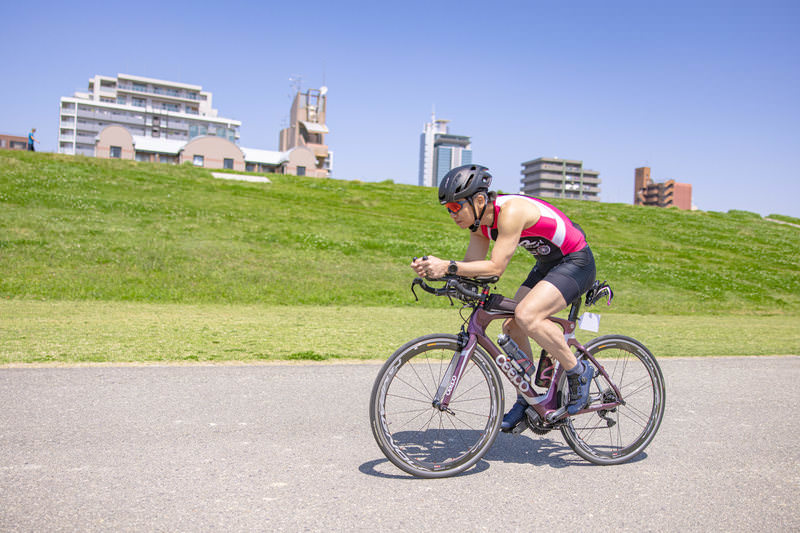

In [36]:
Image('./assets/test_01.jpg')